Episode 1: Total Reward = 0, Steps = 51
Episode 2: Total Reward = 0, Steps = 51
Episode 3: Total Reward = 0, Steps = 51
Episode 4: Total Reward = 0, Steps = 51
Episode 5: Total Reward = 0, Steps = 51
Episode 6: Total Reward = 0, Steps = 51
Episode 7: Total Reward = 10, Steps = 19
Episode 8: Total Reward = 0, Steps = 51
Episode 9: Total Reward = 10, Steps = 51
Episode 10: Total Reward = 10, Steps = 9


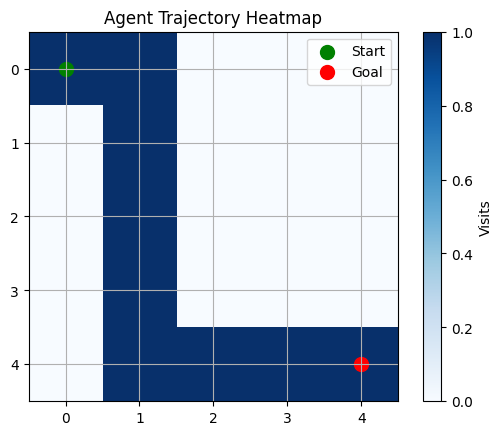

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Gridworld Environment Setup
GRID_SIZE = 5
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_DICT = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}
GOAL_STATE = (4, 4)
MAX_STEPS = 50

def is_valid_state(state):
    return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

def step(state, action):
    move = ACTION_DICT[action]
    new_state = (state[0] + move[0], state[1] + move[1])
    
    if not is_valid_state(new_state):
        new_state = state  # stay if move goes out of bounds
    
    reward = 10 if new_state == GOAL_STATE else 0
    done = (new_state == GOAL_STATE)
    
    return new_state, reward, done

# Agent Loop
def run_episode():
    state = (0, 0)
    total_reward = 0
    trajectory = [state]
    
    for step_num in range(MAX_STEPS):
        action = np.random.choice(ACTIONS)  # Random policy
        next_state, reward, done = step(state, action)
        trajectory.append(next_state)
        total_reward += reward
        state = next_state
        
        if done:
            break
            
    return trajectory, total_reward

# Run 10 episodes and visualize one
for ep in range(10):
    traj, reward = run_episode()
    print(f"Episode {ep+1}: Total Reward = {reward}, Steps = {len(traj)}")

# Visualize trajectory of the last episode
def plot_trajectory(trajectory):
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    
    for (x, y) in trajectory:
        grid[x, y] += 1
        
    plt.imshow(grid, cmap='Blues', origin='upper')
    plt.title("Agent Trajectory Heatmap")
    plt.colorbar(label="Visits")
    plt.scatter(0, 0, c='green', s=100, label='Start')
    plt.scatter(4, 4, c='red', s=100, label='Goal')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_trajectory(traj)


# Tasks

-> Add penalty (e.g., –1) for stepping into the same cell (i.e., bumping walls).

-> Add bonus (e.g., +1) for reaching new cells (encourage exploration).

-> Make the grid 6×6 or 8×8. Does the agent still reach the goal?

-> Add bonus goal states or trap states (–10). See how this affects path behavior.

-> Over 100 episodes, how many times does the agent reach the goal? 

Episode 1: Total Reward = 31, Steps = 42
Episode 2: Total Reward = 7, Steps = 51
Episode 3: Total Reward = 11, Steps = 51
Episode 4: Total Reward = -7, Steps = 51
Episode 5: Total Reward = -18, Steps = 51
Episode 6: Total Reward = -2, Steps = 47
Episode 7: Total Reward = -3, Steps = 51
Episode 8: Total Reward = -11, Steps = 51
Episode 9: Total Reward = 3, Steps = 51
Episode 10: Total Reward = -8, Steps = 51
Episode 11: Total Reward = -13, Steps = 51
Episode 12: Total Reward = 15, Steps = 51
Episode 13: Total Reward = -11, Steps = 51
Episode 14: Total Reward = -5, Steps = 51
Episode 15: Total Reward = 7, Steps = 51
Episode 16: Total Reward = 0, Steps = 51
Episode 17: Total Reward = -1, Steps = 51
Episode 18: Total Reward = -2, Steps = 51
Episode 19: Total Reward = -1, Steps = 51
Episode 20: Total Reward = -55, Steps = 51
Episode 21: Total Reward = -1, Steps = 51
Episode 22: Total Reward = 11, Steps = 51
Episode 23: Total Reward = -9, Steps = 51
Episode 24: Total Reward = -12, Steps = 51

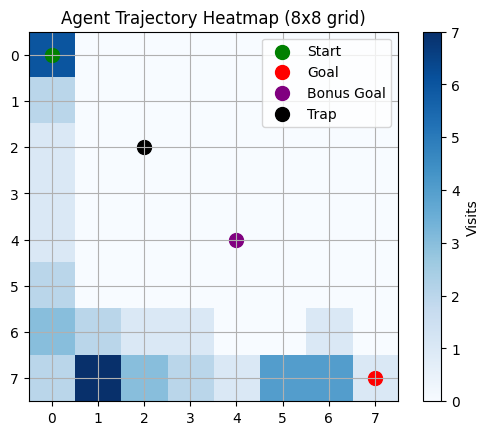

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Gridworld Environment Setup
GRID_SIZE = 8  # Set grid size to 6 or 8
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_DICT = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}
GOAL_STATE = (GRID_SIZE - 1, GRID_SIZE - 1)  # Goal is at the bottom-right corner
BONUS_GOAL_STATE = (4, 4)  # Bonus goal at (4, 4)
TRAP_STATE = (2, 2)  # Trap at (2, 2)
MAX_STEPS = 50
PENALTY = -1  # Penalty for bumping into a wall
BONUS = 1  # Bonus for discovering a new cell
BONUS_GOAL_REWARD = 5  # Reward for reaching the bonus goal
TRAP_PENALTY = -10  # Penalty for stepping into a trap

def is_valid_state(state):
    return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

def step(state, action, visited_cells):
    move = ACTION_DICT[action]
    new_state = (state[0] + move[0], state[1] + move[1])
    
    if not is_valid_state(new_state):
        new_state = state  # stay if move goes out of bounds
        reward = PENALTY  # Apply penalty for bumping into the wall
    else:
        # Reward for new cell visited
        if new_state not in visited_cells:
            visited_cells.add(new_state)
            reward = BONUS  # Bonus for discovering a new cell
        else:
            reward = 0  # No reward if the cell has been visited before
        
        # Goal reward
        if new_state == GOAL_STATE:
            reward = 10  # Goal reward
        
        # Bonus goal state
        elif new_state == BONUS_GOAL_STATE:
            reward = BONUS_GOAL_REWARD
        
        # Trap penalty
        elif new_state == TRAP_STATE:
            reward = TRAP_PENALTY
    
    done = (new_state == GOAL_STATE)
    
    return new_state, reward, done

# Agent Loop
def run_episode():
    state = (0, 0)
    total_reward = 0
    trajectory = [state]
    visited_cells = set([state])  # Start by marking the initial state as visited
    for step_num in range(MAX_STEPS):
        action = np.random.choice(ACTIONS)  # Random policy
        next_state, reward, done = step(state, action, visited_cells)
        trajectory.append(next_state)
        total_reward += reward
        state = next_state
        
        if done:
            break
            
    return trajectory, total_reward

# Run multiple episodes and visualize one
def run_multiple_episodes(num_episodes):
    goal_reaches = 0
    for ep in range(num_episodes):
        traj, reward = run_episode()
        print(f"Episode {ep+1}: Total Reward = {reward}, Steps = {len(traj)}")
        if traj[-1] == GOAL_STATE:
            goal_reaches += 1
    return goal_reaches

# Visualize trajectory of the last episode
def plot_trajectory(trajectory):
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    
    for (x, y) in trajectory:
        grid[x, y] += 1
        
    plt.imshow(grid, cmap='Blues', origin='upper')
    plt.title(f"Agent Trajectory Heatmap ({GRID_SIZE}x{GRID_SIZE} grid)")
    plt.colorbar(label="Visits")
    plt.scatter(0, 0, c='green', s=100, label='Start')
    plt.scatter(GOAL_STATE[0], GOAL_STATE[1], c='red', s=100, label='Goal')
    plt.scatter(BONUS_GOAL_STATE[0], BONUS_GOAL_STATE[1], c='purple', s=100, label='Bonus Goal')
    plt.scatter(TRAP_STATE[0], TRAP_STATE[1], c='black', s=100, label='Trap')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run over 100 episodes and track how many times the agent reaches the goal
goal_reaches = run_multiple_episodes(100)
print(f"Agent reached the goal {goal_reaches} times out of 100 episodes.")

# Visualize trajectory of the last episode
plot_trajectory(run_episode()[0])
